# Big Data (UBA) -  2024

## Trabajo Práctico 1 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 25 de octubre a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo m.n.romero91@gmail.com
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [16]:
# Importa la biblioteca requests para enviar solicitudes HTTP.
import requests

# Definir la palabra clave de búsqueda (en este caso, "cafe").
buscar = "cafe"

# Formar la URL para la API de Mercado Libre.
# MLA representa el sitio de Argentina, y el espacio en la búsqueda se reemplaza por "%20".
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Envía una solicitud GET a la URL especificada.
response = requests.request("GET", url)

# Convierte la respuesta en formato JSON a un diccionario de Python.
data = response.json()

# Extrae la lista de resultados de la clave "results" en el JSON.
resultados = data["results"]

# Inicializa dos listas vacías para almacenar los títulos de productos y sus precios.
productos = []
precios = []

# Itera sobre cada resultado en la lista de resultados.
for result in resultados:
    # Agrega el título del producto a la lista 'productos'.
    productos += [result["title"]]
    # Agrega el precio del producto a la lista 'precios'.
    precios += [result["price"]]

# Crea un diccionario con las listas de productos y precios como columnas.
dicto = {"Productos": productos, "Precios": precios}


#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [23]:
# Importa la biblioteca pandas, utilizada para la manipulación de datos en estructuras tipo DataFrame.
import pandas as pd

# Convierte el diccionario 'dicto' en un DataFrame de pandas.
df_dicto = pd.DataFrame(dicto)

# Calcula el promedio, el valor mínimo y el valor máximo de la columna "Precios".
# Luego imprime los resultados.
print(
    df_dicto["Precios"].mean(),  # Promedio de los precios.
    df_dicto["Precios"].min(),   # Precio mínimo.
    df_dicto["Precios"].max()    # Precio máximo.
)


19058.6158 3966.0 55317.0


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

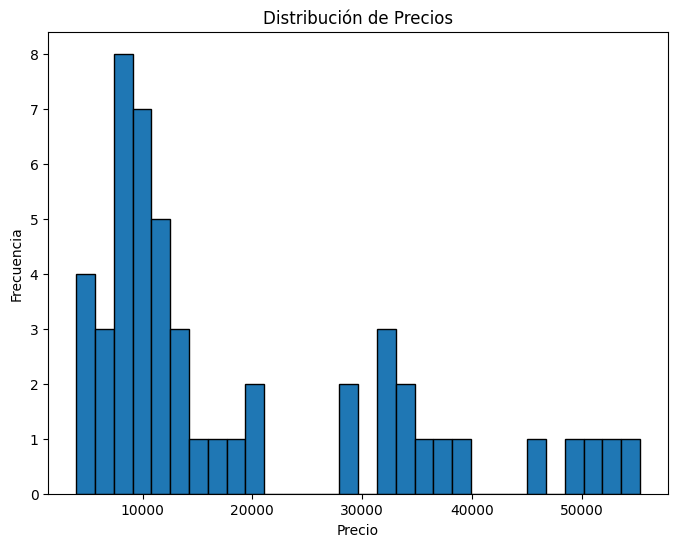

In [24]:
# Importa la biblioteca matplotlib.pyplot, utilizada para crear visualizaciones.
import matplotlib.pyplot as plt

# Crea una nueva figura con un tamaño de 8x6 pulgadas.
plt.figure(figsize=(8, 6))  # Opcional: Ajusta el tamaño de la figura.

# Crea un histograma de la columna "Precios" del DataFrame.
# Usa 30 bins (barras) y bordes negros para mayor claridad.
plt.hist(df_dicto["Precios"], bins=30, edgecolor='black')  # Histograma con 30 bins.

# Agrega la etiqueta para el eje X.
plt.xlabel("Precio")

# Agrega la etiqueta para el eje Y.
plt.ylabel("Frecuencia")

# Agrega el título de la gráfica.
plt.title("Distribución de Precios")

# Muestra la gráfica.
plt.show()


In [26]:
# Definiremos un valor atípico (outlier) como cualquier valor que esté 
# 2 desviaciones estándar por encima o por debajo de la media.

def filtrar_por_desviacion_estandar(df, columna):
    """
    Devuelve un DataFrame con las filas donde los valores en la columna especificada
    están más de 2 desviaciones estándar por encima o por debajo de la media.

    Parámetros:
        df (pd.DataFrame): DataFrame de entrada.
        columna (str): Nombre de la columna en la que se aplicará el filtro.
        
    Retorna:
        pd.DataFrame: DataFrame filtrado con los valores atípicos.
    """
    # Calcula la media y la desviación estándar de la columna especificada.
    media = df[columna].mean()  # Media de los valores en la columna.
    desviacion_estandar = df[columna].std()  # Desviación estándar de los valores en la columna.
    
    # Define los límites inferior y superior (2 desviaciones estándar desde la media).
    limite_inferior = media - 2 * desviacion_estandar  # Límite inferior.
    limite_superior = media + 2 * desviacion_estandar  # Límite superior.
    
    # Filtra el DataFrame para obtener las filas fuera de los límites definidos.
    df_filtrado = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    
    # Retorna el DataFrame filtrado con los valores atípicos.
    return df_filtrado

# Llamada a la función para encontrar los valores atípicos en la columna "Precios".
filtrar_por_desviacion_estandar(df_dicto, "Precios")




,Productos,Precios
11,Café Lavazza - Crema E Aroma Italia En Grano X...,51000.0
35,Cafe En Grano Lavazza Crema E Aroma 1 Kg.,50000.0
43,Cafe Tostado Italiano Luggiani Rosso - 2 Kilos,55317.0
47,Cafe Lavazza Crema E Aroma En Granos X 1kg-ita...,52436.0


#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [27]:
# Definimos la palabra clave de búsqueda (en este caso, "mate").
buscar_2 = "mate"

# Formamos la URL para la API de Mercado Libre.
# MLA representa el sitio de Argentina, y se reemplazan los espacios por "%20".
url_2 = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar_2.replace(" ", "%20"))

# Enviamos una solicitud GET a la URL formada.
response_2 = requests.request("GET", url_2)

# Convertimos la respuesta en un diccionario de Python usando el formato JSON.
data_2 = response_2.json()

# Extraemos los resultados del JSON usando la clave "results".
resultados_2 = data_2["results"]

# Inicializamos dos listas vacías para almacenar los productos y sus precios.
productos_2 = []
precios_2 = []

# Iteramos sobre cada resultado en los resultados extraídos.
for result in resultados_2:
    # Agregamos el título del producto a la lista 'productos_2'.
    productos_2 += [result["title"]]
    # Agregamos el precio del producto a la lista 'precios_2'.
    precios_2 += [result["price"]]

# Creamos un DataFrame de pandas a partir de las listas de productos y precios.
df_dicti_2 = pd.DataFrame({"Productos": productos_2, "Precios": precios_2})

# Calculamos e imprimimos el promedio, el precio mínimo y el máximo de la columna "Precios".
print(
    df_dicti_2["Precios"].mean(),  # Promedio de los precios.
    df_dicti_2["Precios"].min(),   # Precio mínimo.
    df_dicti_2["Precios"].max()    # Precio máximo.
)


29556.390408163268 3280.0 82900.0


### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [28]:
# Importación de las bibliotecas necesarias:
# - requests: para enviar solicitudes HTTP y obtener el contenido de la página web.
# - BeautifulSoup: para analizar contenido HTML y XML.
# - pandas: para crear y manipular DataFrames.
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la página principal de La Nación que queremos extraer.
url = "https://www.lanacion.com.ar/"

# Enviar una solicitud GET a la URL especificada para obtener el contenido HTML de la página web.
response = requests.get(url)

# Lanza una excepción si la solicitud HTTP devuelve un código de estado no exitoso (no 2xx).
response.raise_for_status()  # Asegura que la solicitud se haya completado con éxito.

# Crear un objeto BeautifulSoup para analizar el contenido HTML obtenido.
# El "html.parser" indica a BeautifulSoup que use el analizador HTML incorporado de Python.
soup = BeautifulSoup(response.content, "html.parser")

# Inicializar una lista vacía para almacenar los enlaces de los artículos de noticias.
links = []

# Iterar sobre todas las etiquetas <a> (etiquetas de enlace) en el HTML analizado.
# Cada etiqueta <a> representa un enlace en la página web.
for a_tag in soup.find_all("a", href=True):
    # Extraer el atributo 'href', que contiene la URL del enlace.
    href = a_tag["href"]
    
    # Filtrar los enlaces para incluir únicamente:
    # - URLs completas que contengan "lanacion.com.ar".
    # - URLs relativas que comiencen con "/nota/", indicando artículos de noticias.
    if "lanacion.com.ar" in href or href.startswith("/nota/"):
        # Si el enlace comienza con "http", ya es una URL completa.
        # De lo contrario, se le agrega el prefijo de la URL base para formar una URL completa.
        full_link = href if href.startswith("http") else f"https://www.lanacion.com.ar{href}"
        
        # Agregar el enlace extraído como un diccionario a la lista 'links'.
        links.append({"link": full_link})

# Crear un DataFrame a partir de la lista 'links'.
# Cada diccionario en la lista se convierte en una fila del DataFrame, con 'link' como columna.
df = pd.DataFrame(links)

# Comprobar si el DataFrame está vacío (es decir, si no se encontraron enlaces).
if df.empty:
    print("No se encontraron enlaces de noticias.")  # Imprimir un mensaje si no se encuentran enlaces.
else:
    # Definir la ruta del archivo de salida para guardar el DataFrame como un archivo Excel.
    output_path = "lanacion_news_links.xlsx"
    
    # Guardar el DataFrame en el archivo Excel especificado sin incluir los índices de las filas.
    df.to_excel(output_path, index=False)
    
    # Imprimir un mensaje de éxito indicando dónde se guardó el archivo.
    print(f"Enlaces guardados exitosamente en {output_path}")

# Mostrar el DataFrame para verificar visualmente los enlaces extraídos.
print(df)


Enlaces guardados exitosamente en lanacion_news_links.xlsx
                                                  link
0                        https://club.lanacion.com.ar/
1                       https://lnmas.lanacion.com.ar/
2                      https://foodit.lanacion.com.ar/
3                 https://canchallena.lanacion.com.ar/
4               https://www.lanacion.com.ar/dolar-hoy/
..                                                 ...
138  https://www.contacto.lanacion.com.ar/ayuda?_ga...
139                https://club.lanacion.com.ar/ayuda/
140  https://www.contacto.lanacion.com.ar/tyc?_ga=2...
141  https://suscripciones.lanacion.com.ar/suscribi...
142  https://www.lanacion.com.ar/arc/outboundfeeds/...

[143 rows x 1 columns]


In [29]:
df

,link
0,https://club.lanacion.com.ar/
1,https://lnmas.lanacion.com.ar/
2,https://foodit.lanacion.com.ar/
3,https://canchallena.lanacion.com.ar/
4,https://www.lanacion.com.ar/dolar-hoy/
...,...
138,https://www.contacto.lanacion.com.ar/ayuda?_ga...
139,https://club.lanacion.com.ar/ayuda/
140,https://www.contacto.lanacion.com.ar/tyc?_ga=2...
141,https://suscripciones.lanacion.com.ar/suscribi...
